# Comparing Performances of xcube-cci, xcube-cci-zarr and kerchunk

## Preparation

In [1]:
from xcube.core.normalize import normalize_dataset
from xcube.core.store.descriptor import new_data_descriptor
from xcube.core.store import new_data_store
import xarray as xr

In [2]:
cci_odp_store = new_data_store('cciodp')
cci_zarr_store = new_data_store('ccizarr')

In [3]:
def open_and_normalize_kerchunk_snow_ds():
    kerchunk_snow_ds = xr.open_dataset(
        "reference://", engine="zarr",
        backend_kwargs={
            "storage_options": {
                "fo": 's3://cate-kerchunk-test/ESACCI-L3C_SNOW-SWE-SMMR-NIMBUS7-fv1.0.json',
                "remote_protocol": "s3",
                "remote_options": {
                    'key': '',
                    'secret': ''
                }
            },
            "consolidated": False
        }
    )
    return normalize_dataset(kerchunk_snow_ds)

## Get Metadata

In [4]:
%time cci_snow_desc = cci_odp_store.describe_data('esacci.SNOW.day.L3C.SWE.multi-sensor.multi-platform.MERGED.1-0.r1')

CPU times: user 252 ms, sys: 14 ms, total: 266 ms
Wall time: 2.73 s


In [5]:
%time zarr_snow_desc = cci_zarr_store.describe_data('ESACCI-L3C_SNOW-SWE-1979-2018-fv1.0.zarr')

CPU times: user 436 ms, sys: 26.1 ms, total: 462 ms
Wall time: 4.74 s


In [6]:
%time kerchunk_snow_desc = new_data_descriptor('ESACCI-L3C_SNOW-SWE-1979-2018-fv1.0.zarr', open_and_normalize_kerchunk_snow_ds())

CPU times: user 459 ms, sys: 22 ms, total: 481 ms
Wall time: 1.58 s


## Opening Data

In [7]:
%time cci_odp_store.open_data('esacci.SNOW.day.L3C.SWE.multi-sensor.multi-platform.MERGED.1-0.r1')

CPU times: user 924 ms, sys: 16.9 ms, total: 941 ms
Wall time: 1.9 s


<xarray.Dataset>
Dimensions:      (lat: 720, nv: 2, lon: 1440, time: 14391, bnds: 2)
Coordinates:
  * lat          (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
    lat_bnds     (lat, nv) float64 dask.array<chunksize=(720, 2), meta=np.ndarray>
  * lon          (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
    lon_bnds     (lon, nv) float64 dask.array<chunksize=(1440, 2), meta=np.ndarray>
  * time         (time) datetime64[ns] 1979-01-06T12:00:00 ... 2018-05-31T12:...
    time_bnds    (time, bnds) datetime64[ns] dask.array<chunksize=(14391, 2), meta=np.ndarray>
Dimensions without coordinates: nv, bnds
Data variables:
    spatial_ref  float64 ...
    swe          (time, lat, lon) float64 dask.array<chunksize=(1, 720, 720), meta=np.ndarray>
    swe_std      (time, lat, lon) float64 dask.array<chunksize=(1, 720, 720), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    title:                   esacci.SNOW.day.L3C.SWE.multi-sensor.multi-platf...
    date_created:            2022-07-13T10:08:04.802557
    processing_level:        L3C
    time_coverage_start:     1979-01-06T00:00:00
    time_coverage_end:       2018-06-01T00:00:00
    time_coverage_duration:  P14391DT0H0M0S
    history:                 [{'program': 'xcube_cci.chunkstore.CciChunkStore...

In [8]:
cci_snow_ds = cci_odp_store.open_data('esacci.SNOW.day.L3C.SWE.multi-sensor.multi-platform.MERGED.1-0.r1')

In [9]:
%time cci_zarr_store.open_data('ESACCI-L3C_SNOW-SWE-1979-2018-fv1.0.zarr')

CPU times: user 53.1 ms, sys: 864 µs, total: 54 ms
Wall time: 891 ms


<xarray.Dataset>
Dimensions:   (lat: 720, nv: 2, lon: 1440, time: 7397)
Coordinates:
  * lat       (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
    lat_bnds  (lat, nv) float64 dask.array<chunksize=(720, 2), meta=np.ndarray>
  * lon       (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
    lon_bnds  (lon, nv) float64 dask.array<chunksize=(1440, 2), meta=np.ndarray>
  * time      (time) datetime64[ns] 1979-01-06 1979-01-08 ... 2018-05-31
Dimensions without coordinates: nv
Data variables:
    swe       (time, lat, lon) float64 dask.array<chunksize=(8, 720, 1440), meta=np.ndarray>
    swe_std   (time, lat, lon) float64 dask.array<chunksize=(8, 720, 1440), meta=np.ndarray>
Attributes: (12/43)
    Conventions:                CF-1.7
    cdm_data_type:              grid
    comment:                    The following auxiliary datasets are used for...
    creator_email:              kari.luojus@fmi.fi (Scientific and Production...
    creator_name:               Finnish Meteorological Institute
    creator_url:                www.fmi.fi
    ...                         ...
    time_coverage_duration:     P1D
    time_coverage_end:          19700101T000000Z
    time_coverage_resolution:   P1D
    time_coverage_start:        19700101T000000Z
    title:                      ESA CCI snow SWE product level L3C daily
    tracking_id:                b6d8f6f7-09fc-4d3f-961b-96400204b944

In [10]:
zarr_snow_ds = cci_zarr_store.open_data('ESACCI-L3C_SNOW-SWE-1979-2018-fv1.0.zarr')

In [11]:
%time open_and_normalize_kerchunk_snow_ds()

CPU times: user 21.3 ms, sys: 211 µs, total: 21.5 ms
Wall time: 110 ms


<xarray.Dataset>
Dimensions:      (lat: 720, time: 7397, nv: 2, lon: 1440)
Coordinates:
  * lat          (lat) float64 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon          (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * time         (time) datetime64[ns] 1979-01-06 1979-01-08 ... 2018-05-31
Dimensions without coordinates: nv
Data variables:
    lat_bnds     (time, lat, nv) float64 ...
    lon_bnds     (time, lon, nv) float64 ...
    spatial_ref  (time) float64 ...
    swe          (time, lat, lon) float64 ...
    swe_std      (time, lat, lon) float64 ...
Attributes: (12/42)
    Conventions:                CF-1.7
    cdm_data_type:              grid
    comment:                    The following auxiliary datasets are used for...
    creator_email:              kari.luojus@fmi.fi (Scientific and Production...
    creator_name:               Finnish Meteorological Institute
    creator_url:                www.fmi.fi
    ...                         ...
    time_coverage_duration:     P1D
    time_coverage_end:          19790106T235959Z
    time_coverage_resolution:   P1D
    time_coverage_start:        19790106T000000Z
    title:                      ESA CCI snow SWE product level L3C daily
    tracking_id:                4bcd563d-f07b-4046-b55a-06988a96aee8

In [12]:
kerchunk_snow_ds = open_and_normalize_kerchunk_snow_ds()

## Calculate Mean

In [22]:
%timeit cci_snow_ds.swe[0:10].mean().values

85 ms ± 4.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [23]:
%timeit zarr_snow_ds.swe[0:10].mean().values

783 ms ± 318 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [24]:
%timeit kerchunk_snow_ds.swe[0:10].mean().values

307 ms ± 10.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Plot

65.3 ms ± 2.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


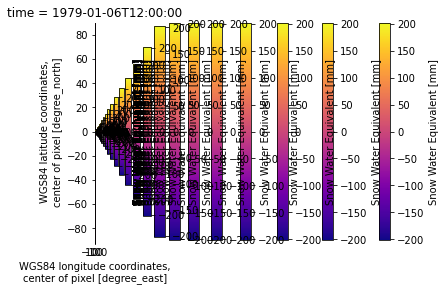

In [25]:
%timeit cci_snow_ds.swe.isel(time=0).plot.imshow(cmap='plasma')

337 ms ± 31.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


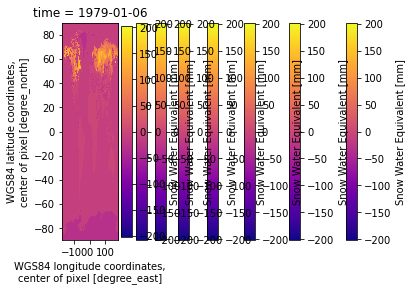

In [26]:
%timeit zarr_snow_ds.swe.isel(time=0).plot.imshow(cmap='plasma')

124 ms ± 22.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


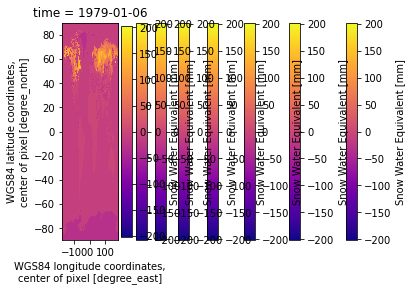

In [27]:
%timeit kerchunk_snow_ds.swe.isel(time=0).plot.imshow(cmap='plasma')